In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


---
# **Linear Discrimant Analysis**

In [3]:
class LDA:
    def __init__(self):
        self.classes = None
        self.n_classes = None
        self.components = None

    def fit(self, X, y):
        _, n_features = X.shape

        self.classes = np.unique(y)
        self.n_classes = len(self.classes)

        S_w = np.zeros((n_features, n_features), dtype=np.float64)
        S_b = np.zeros((n_features, n_features), dtype=np.float64)

        
        mean = np.mean(X, axis = 0)
        
        for cls in self.classes:
            X_cls = X[y==cls]
            cls_mean = np.mean(X_cls, axis = 0)
            X_cls -= cls_mean
            
            S_w += np.dot(X_cls.T, X_cls)

            n_cls = X_cls.shape[0]
            mean_diff = (cls_mean-mean).reshape(n_features, 1)
            S_b += n_cls*np.dot(mean_diff, mean_diff.T)
        
        res_mat = np.linalg.inv(S_w)@S_b
        eigenvalues, eigenvectors = np.linalg.eig(res_mat)
        sort_indices =  np.argsort(abs(eigenvalues))[::-1]
        eigenvectors = eigenvectors[:,sort_indices]
        self.components = eigenvectors[:,:self.n_classes-1]
    
        return
    
    def transform(self, X):
        return np.dot(X,self.components)

---
# **Code Usage**

In [10]:
def dataloader():

    df = pd.read_csv('../data/cancer_detection.csv')
    df.drop(columns=df.columns[[0, -1]], inplace=True)   #  Dropping non-informative columns
    df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})   # Malignant -> 1, Benign -> -1

    return df

def preprocessor(df):
    y = df['diagnosis'].to_numpy()
    X = df.drop(['diagnosis'], axis=1).to_numpy()

    return X, y

In [11]:
X, y = preprocessor(dataloader())
lda = LDA()
lda.fit(X, y)

transformed_X = lda.transform(X)

In [18]:
print("Original features shape:", X.shape)
print("Projected features Shape:",transformed_X.shape)

Original features shape: (569, 30)
Projected features Shape: (569, 1)


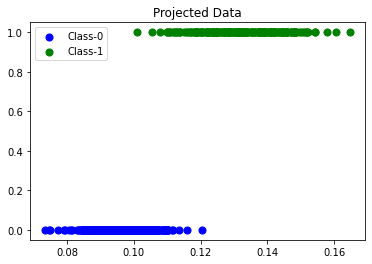

In [17]:
plt.scatter(transformed_X[y==0], [0]*len(transformed_X[y==0]), s = 50, c = 'blue', label = 'Class-0')
plt.scatter(transformed_X[y==1], [1]*len(transformed_X[y==1]), s = 50, c = 'green', label = 'Class-1')
plt.title('Projected Data')
plt.legend()
plt.show();